<a href="https://colab.research.google.com/github/Preet1990/KNN_NB_Project/blob/main/Knn_Nb_Algo_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section I : Accessing the Data

Make a pandas DataFrame from the CSV

How many variables does the dataset contain?

What is the data about?

What are we trying to predict here?


In [24]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [25]:
dataset = pd.read_csv("/content/ortho_knnnb.csv")
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [26]:
#Printing Dimension of datasets

print("Dimensions of data set:", dataset.shape)

Dimensions of data set: (310, 7)


In [27]:
# printing attributes (columns) name

print("Columns name:", dataset.columns.values)

Columns name: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


# Section II : Exploratory Data Analysis

Perform some descriptive statistics and make a note of your findings

Plot appropriate graphs to understand the relation between the variables.

Point out any observations and comment on the strength of the relationships if any.


In [28]:
# Showing datatypes of the columns

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [29]:
# getting discriptive statistcs (Summary of the data)

dataset.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


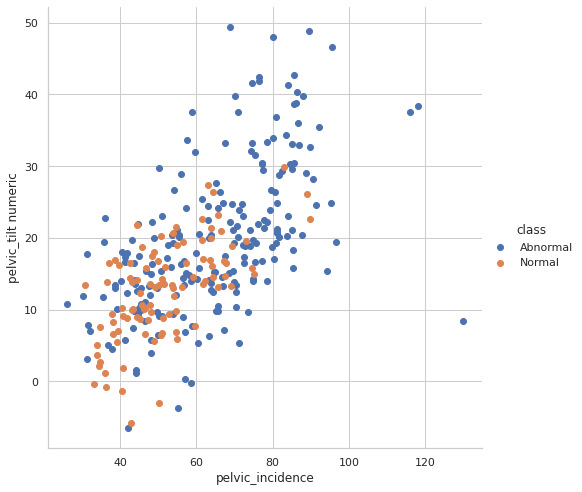

In [30]:
# 2-D Scatter plot to understand the relation between the variables. .

import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(dataset, hue="class", size=7) \
   .map(plt.scatter, "pelvic_incidence", "pelvic_tilt numeric") \
   .add_legend();
plt.show();

# Section III : Prepare data for Training!

Make a new column **symptom_class** with the abnormal rows as 1 and the normal rows as 0, drop the **class** column

Split the entire dataset into independent features and symptoms as the response variable

Normalize the variables.



In [31]:
#Identifing missing Values
miss_val = dataset.isna().sum()
miss_val

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [32]:
#Check unique value of class
dataset['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [33]:
#symptom_class=pd.get_dummies(dataset,columns=['class'])
#symptom_class

In [34]:

class_val = dataset.columns[dataset.dtypes =='object']
df_new = pd.get_dummies(dataset,columns = class_val)
df_new.rename(columns={'class_Abnormal':'symptom_class'},inplace = True)
df_new.drop('class_Normal',axis = 1,inplace = True)
dataset = df_new


In [35]:
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [36]:
dataset.symptom_class.value_counts()

1    210
0    100
Name: symptom_class, dtype: int64

In [37]:
# Splitting Data set

from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.20,random_state = 1)

In [38]:
# Selecting the independent variable

x_train = dataset.drop(['symptom_class'],axis = 1)
#x_tarin.info()
y_train = dataset['symptom_class'] 
#y_train
x_test = dataset.drop(['symptom_class'],axis = 1)
y_test = dataset['symptom_class'] 

In [39]:
print('Dimension of train_x :',x_train.shape)
print('Dimension of train_y :',y_train.shape)
print('Dimension of test_x :',x_test.shape)
print('Dimension of test_y :',y_test.shape)

Dimension of train_x : (310, 6)
Dimension of train_y : (310,)
Dimension of test_x : (310, 6)
Dimension of test_y : (310,)


# Section IV : Training with KNN

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 6 )
# classifier.fit(x_train, y_train)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_accuracy=[]
for k in range(3,10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  train_pred=knn.predict(x_train)
  train_score=accuracy_score(train_pred,y_train)
  test_pred= knn.predict(x_test)
  test_score=(round(accuracy_score(test_pred,y_test)*100,2))
  test_accuracy.append(test_score)
  print("Test Accuracy: ",test_score,"Value of K: ",k)

Test Accuracy:  92.26 Value of K:  3
Test Accuracy:  87.42 Value of K:  4
Test Accuracy:  86.45 Value of K:  5
Test Accuracy:  85.16 Value of K:  6
Test Accuracy:  85.81 Value of K:  7
Test Accuracy:  84.19 Value of K:  8
Test Accuracy:  84.52 Value of K:  9


In [54]:
# y_pred = classifier.predict(x_test)

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# result = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(result)
# print(" ")

# result1 = classification_report(y_test, y_pred)
# print("Classification Report:",)
# print (result1)
# print(" ")

# result2 = accuracy_score(y_test,y_pred)
# print("Accuracy:",result2)

# Section V : Training with Naive Bayes

In [44]:
# Fitting Naive Bayes Classification to the Training set 

from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB()

In [45]:
#Predicting the Test set results
y_pred = nvclassifier.predict(x_test)
print(y_pred)

[1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0]


In [46]:
# Making the Confusion Matrix and accuracy

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(" ")

acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Confusion Matrix:
[[ 88  12]
 [ 56 154]]
 
Accuracy: 0.7806451612903226
